Lo siguiente está basado en el libro de B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009 y de G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)

**Notas:**

* Se utilizará el paquete *prob* de *R* para los experimentos descritos en la nota y aunque con funciones nativas de *R* se pueden crear los experimentos, se le da preferencia a mostrar cómo en *R* se tienen paquetes para muchas aplicaciones.

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

* Cuidado al utilizar las funciones del paquete *prob* para construir espacios de probabilidad grandes como lanzar un dado 9 veces... (tal experimento tiene 10 millones de posibles resultados)

In [1]:
options(repr.plot.width=3, repr.plot.height=3) #esta línea sólo se ejecuta para jupyterlab con R

In [2]:
library(prob)
library(ggplot2)

Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: fOptions

Attaching package: 'prob'

The following objects are masked from 'package:base':

    intersect, setdiff, union



# Variables aleatorias

En este tema nos interesa asociar un *número* con el experimento aleatorio, aún más, que el número esté asociado con cada resultado del experimento aleatorio de modo que al realizar el experimento y observar el resultado $\omega$ en $S$, el espacio de resultados, se calcule el número $X$. Esto es, para cada resultado (outcome) $r$ en $S$ se asocia el número $X(r)=x$.

Una variable aleatoria $X$ es una **función** $X: S \rightarrow \mathbb{R}$ que asocia cada resultado (outcome) $r \in S$ de un experimento aleatorio, exactamente un número $X(r)=x$.

**Obs:** obsérvese que $X$ es aleatoria pues se define en términos del experimento aleatorio, por lo que $X$ toma valores númericos, cada uno con cierta probabilidad.

**Obs2:** típicamente se utiliza las letras mayúsculas para denotar a las variables aleatorias (funciones) y sus valores observados (los números que pueden tomar) con letras minúsculas. 

Así como $S$ es el espacio de resultados posibles del experimento, el **soporte de una variable aleatoria** es el conjunto de posibles valores que la variable aleatoria puede tomar. Si $X$ es variable aleatoria su soporte se denota: $S_X$.

## Ejemplos

1) **Experimento:** lanzar dos veces una moneda. 

Se tiene: $S=${AA, AS, SA, SS}. Defínase $X$ la variable aleatoria como: $X$ cuenta el número de águilas. Entonces $X(AA) = 2$, $X(AS)=1$. Y podemos realizar una tabla con las posibilidades:

|$r \in S$| AA|AS|SA|SS|
|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:
|$X(r) = x$|2|1|1|0|

Se tiene que $S_X=\{0,1,2\}$ (conjunto de valores de $X$).

2) **Experimento:** lanzar una moneda hasta observar un águila.

Se tiene: $S=${A, SA, SSA, SSSA, \dots}. Defínase $Y$ la variable aleatoria como: $Y$ cuenta el número de soles antes del primer águila. Entonces $S_Y=\{0, 1, 2, \dots\}$

3) Considérese el experimento de lanzar una moneda al aire y defínase la variable aleatoria $Z$ como: $Z$ el tiempo en segundos que le toma a la moneda caer al suelo. Entonces $S$ es el conjunto de números positivos y de hecho $S_Z$ también lo es.

**Obs:** Obsérvese en los ejemplos anteriores que los soportes de las variables $X, Y, Z$ son distintos. De hecho: $S_X$ es un conjunto finito, $S_Y$ es un conjunto infinito pero contable y $S_Z$ es un conjunto infinito no contable. Variables aleatorias con soportes similares a los de $X$ y $Y$ se les nombra **discretas** y similares al soporte de $Z$ se les nombra **continuas**.

## Distribución de probabilidad de una variable aleatoria

Supongamos que $X$ es una variable aleatoria tal que dado un conjunto de resultados inciertos $\{r_1,\dots, r_n\}$ ésta toma valores $X(r_1)=x_1,\dots, X(r_n)=x_n$. Nótese que éstos no necesariamente son distintos. La probabilidad de que la variable aleatoria tome el valor $x_i$ se denota por: $P(X = x_i)$.

A la regla de correspondencia que asigna a cada valor $x_i$ su probabilidad $P(X = x_i),$ se le llama **distribución de probabilidad** de la variable aleatoria $X$. Si denotamos a esta regla por $f$ se tiene que: $f(x_i) = P(X = x_i)$.

**Notas:**

* A veces también se utiliza la notación: $f_X(x_i)$.

* Obsérvese que en estricto sentido se debería escribir: $f(x_i) = P(X(r_i) = x_i)$ pero por simplicidad en la escritura y notación se utiliza $f(x_i) = P(X = x_i)$.

### Ejemplos

1) Supongamos que un volado ofrece una ganancia de $\$ 100$ si sale águila y una pérdida de $\$ 60$ si se sale sol. La variable aleatoria $X$ es la función dada por: $X(A) = 100$, $X(S) = -60$. La distribución de probabilidad $f$ es: $$f(100) = P(X = 100) = P(\{A\}) = \frac{1}{2}$$ 

$$f(-60) = P(X = -60) = P(\{S\}) = \frac{1}{2}$$

2) Supóngase que el evento aleatorio es: $E=$ {el día de hoy llueve} y defínase $X$ variable aleatoria que representa un número que asocia mi satisfacción con la situación "llevar paraguas" y toma valores: $X(E) = 5, X(E^c) = -1$, esto es: llevo paraguas y si llueve me produce una satisfacción de $5$ puntos y si llevo paraguas y no llueve la inconveniencia me causa un disgusto de -1 punto.


También defínase $Y$ como la variable aleatoria que representa un número que asocia mi satisfacción  con la situación "no llevar paraguas" y toma valores: $Y(E) = -6$, $Y(E^c)=4$. 


Las distribuciones de probabilidad de $X$ y $Y$ están dadas por la siguiente tabla y supóngase que $f$ es la distribución de probabilidad $X$ y $g$ es la de $Y$:

|Evento|Valor de $X$|Valor de $Y$|P(Variable aleatoria = valor)|
|:----:|:----:|:----:|:----:
|llueve|5|-6|f(5) = P(X=5) = g(-6) = P(Y=-6) = .45|
|no llueve|-1|4|f(-1) = P(X = -1) = g(4) = P(Y = 4) = .55|

3) Pensemos en una urna con $10$ canicas rojas, $2$ amarillas y $3$ azules. Se nos ofrecen los siguientes premios: perder $\$100$ si sacamos una canica roja, ganar $\$150$ si sacamos un canica azul o amarilla. La variable aleatoria $Y$ es $Y(\{roja\}) = -100, Y (\{azul\}) = Y (\{amarilla\}) = 150$. La distribución de probabilidad de $f$ es:

$$f(-100) = P(Y = -100) = P(\{roja\}) = \frac{10}{15}$$

$$f(150) = P(Y = 150) = P(\{azul\} \cup \{amarilla\}) = \frac{3}{15} + \frac{2}{15}$$

## Representación de la distribución de probabilidad de una variable

La distribución de probabilidad puede representarse visualmente en un diagrama al que llamamos **histograma de probabilidad**. Un histograma es simplemente una gráfica de barras. Para este caso, en el eje horizontal se representan los valores que puede tomar la variable aleatoria y en el eje vertical la probabilidad asociada a cada valor. Por ejemplo, para el caso de los ejemplos $3)$ anterior:

In [3]:
df = data.frame(evento = c('no llueve', 'llueve'), X = c(-1, 5), probabilidad=c(.55,.45))

In [4]:
df

evento,X,probabilidad
<fct>,<dbl>,<dbl>
no llueve,-1,0.55
llueve,5,0.45


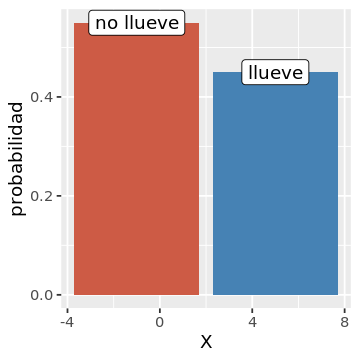

In [5]:
ggplot(data = df, aes(x=X, y=probabilidad)) + 
geom_col(fill=c('coral3','steelblue'))  +
geom_label(aes(label=evento))

Y si se asume que la base de los rectángulos, por convención mide una unidad, observemos que la suma de las áreas de los rectángulos siempre es $1$ pues ésta es simplemente la suma de las probabilidades de todos los valores posibles que toma la variable aleatoria, concretamente: $$\displaystyle \sum_{i=1}^nf(x_i) = 1.$$

## Transformaciones de variables aleatorias

### ¿Cómo hacerlo en R?

Se usa la función `addrv` del paquete `prob` y se tienen $2$ opciones (la función `addrv` se aplica únicamente a **data frames**).

In [6]:
args(addrv)

function (space, FUN = NULL, invars = NULL, name = NULL, ...) 
NULL

**Primera opción**

La idea es escribir una fórmula que defina la variable aleatoria dentro de la función `addrv`. El resultado se añadirá como columna a un *data frame*.

#### Ejemplo

In [7]:
S <- rolldie(3, nsides = 4, makespace = TRUE) #lanzamiento de un dado tres veces.
                                              #el dado tiene cuatro lados

In [8]:
head(S)

X1,X2,X3,probs
<int>,<int>,<int>,<dbl>
1,1,1,0.015625
2,1,1,0.015625
3,1,1,0.015625
4,1,1,0.015625
1,2,1,0.015625
2,2,1,0.015625


In [9]:
NROW(S)

[1] 64

Defínase la variable aleatoria: $U = X1-X2+X3$. Entonces:

In [10]:
S <- addrv(S, U = X1-X2+X3)

In [11]:
print(head(S))

  X1 X2 X3 U    probs
1  1  1  1 1 0.015625
2  2  1  1 2 0.015625
3  3  1  1 3 0.015625
4  4  1  1 4 0.015625
5  1  2  1 0 0.015625
6  2  2  1 1 0.015625


In [12]:
NROW(S)

[1] 64

Se pueden responder preguntas del tipo:

In [13]:
Prob(S, U > 6)

[1] 0.015625

**Segunda opción**

Usar una función de R o hecha por users como argumento a la función `addrv`. Por ejemplo, defínanse $V=\max(X1, X2, X3)$ y $W=X1+X2+X3$, entonces:

In [14]:
S <- addrv(S, FUN = max, invars = c("X1","X2","X3"), name = "V") #max está definida en R
S <- addrv(S, FUN = sum, invars = c("X1","X2","X3"), name = "W") #sum está definida en R

In [15]:
print(head(S))

  X1 X2 X3 U V W    probs
1  1  1  1 1 1 3 0.015625
2  2  1  1 2 2 4 0.015625
3  3  1  1 3 3 5 0.015625
4  4  1  1 4 4 6 0.015625
5  1  2  1 0 2 4 0.015625
6  2  2  1 1 2 5 0.015625


**Obs:** obsérvese que se utilizó el argumento `invars` para especificar a qué variables se les debe aplicar la función definida en el argumento `FUN` (si no se especifica, `FUN` se aplica a todas las columnas diferentes de `probs`. También obsérvese que tiene un argumento `name` para nombrar a la nueva variable.

### Distribución marginal de variables aleatorias

En los ejemplos anteriores se observa que añadir variables aleatorias al espacio de probabilidad (data frame al que se le añade la columna `probs`) con `addrv` resultan en renglones de la variable aleatoria en cuestión repetidos. Se puede utilizar la función `marginal` para agregar los renglones del espacio de resultados por los valores de la variable aleatoria y acumular la probabilidad asociada con los valores distintos de ésta:

In [16]:
marginal(S, vars = "V") #equivalente a realizar: sum(S[S$V==1,]$probs) por ejemplo
                        #para valor V=1

V,probs
<int>,<dbl>
1,0.015625
2,0.109375
3,0.296875
4,0.578125


Esto se conoce como la distribución de probabilidad marginal de $V$ o sólo distribución marginal.

También es posible calcular la distribución de probabilidad conjunta entre $V$ y $W$:

In [17]:
marginal(S, vars = c("V", "W")) #equivalente a realizar: sum(S[S$V==3 & S$W==7,]$probs) 
                                #por ejemplo para V=3 y W=7

V,W,probs
<int>,<int>,<dbl>
1,3,0.015625
2,4,0.046875
2,5,0.046875
3,5,0.046875
2,6,0.015625
3,6,0.093750
4,6,0.046875
3,7,0.093750
4,7,0.093750


## Valor esperado de variables aleatorias

Se quiere hacer una rifa para recaudar fondos para alguna buena causa. Hay un premio único de $\$10,000$ y los boletos de la rifa cuestan $\$100$. Sea $n$ el número de boletos que se venden, de manera que la probabilidad de ganar el premio es de $\frac{1}{n}$. De esta forma, la compradora de un boleto tiene como valor esperado para esta rifa: $$\frac{1}{n}(1000-100) + \left(1-\frac{1}{n}\right)(-100)$$.

y la organizadora de la misma tiene la ganancia segura de: $100n-10000$. Evidentemente la rifa no debe realizarse si no se venden al menos $100$ boletos, ya que la organizadora perdería dinero. La siguiente tabla muestra el valor esperado de la rifa para la compradora del boleto y la ganancia de la organizadora para algunos valores de $n$

|n|Valor esperado (comprador)|Ganancia (organizadora)|
|:----:|:----:|:----:|
|100|0|0|
|150|$-33.\bar{3}$|5000|
|200|-50|10000|
|500|-80|40000|

Supongamos que la variable aleatoria $X$ toma valores $x_1, \dots, x_n$ y sean $f(x_1),\dots,f(x_n)$ los valores de la distribución de probabilidad asociada. Definimos el valor esperado o esperanza de $X$ como: $$E(X) = \displaystyle \sum_{i=1}^nx_iP(X=x_i) = \sum_{i=1}^nx_if(x_i)$$.

**Obs:** obsérvese que si todos los valores son equiprobables, esto es: $P(X=x_1) = P(X = x_2) = \cdots = P(X = x_n) = \frac{1}{n}$, el valor esperado de $X$ es: $$E(X) = \frac{1}{n}\displaystyle\sum_{i=1}^nx_i$$.

Así, el valor esperado no es más que un promedio ponderado por la probabilidad de obtener $x_i$ como resultado.

## Ejercicios

1) Considérese lanzar dos monedas. Sea $X$ la variable aleatoria que cuenta el número de águilas que aparecen. Calcula la probabilidad de $P(X=0), P(X=1), P(X=2)$.

2)Considérese el sorteo de Melate (elegir una combinación de seis números diferentes entre el $1$ y el $56$ sin orden y sin reemplazo) "simplificado" con una bolsa acumulada de $N$ y la variable aleatoria $X$ que toma dos valores: $N$ si se elige la combinación ganadora y $0$ en cualquier otro caso. ¿Cuál es la distribución de probabilidad de $X$?

(es simplificado pues en realidad la bolsa acumulada se reparte entre el número de ganadores y varios premios menores, según el número de cifras acertadas entre dos y seis.)